# Classification

With this exercise, you can learn more about classification. You can try out the algorithms on a data set and compare the performance of the different classifiers with different performance metrics.

Please note that the biggest challenge of this exercise is to select good *hyper parameters* of the algorithms, e.g., tree depths, activation functions, etc. The performance of the algorithms depends on this. In the bonus task, you can see that this can quickly consume huge amounts of computational capacity. 

## Libraries and Data

Your task in this exercise is pretty straight forward: apply different classification algorithms to a data set, evaluate the results, and determine the best algorithm. You can find everything you need in ```sklearn```. We use [data about dominant types of trees in forests](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) in this exercise.

We start by loading the data an importing the libraries we require. We also print the description of the data. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_covtype
from sklearn.metrics import precision_recall_fscore_support,matthews_corrcoef
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

forests = fetch_covtype()
X = forests.data
Y = forests.target

print(forests.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

We now take a rudimentary look at the data. Most importantly, we check if there is class level imbalance or if each class is represented the same in the available data. 

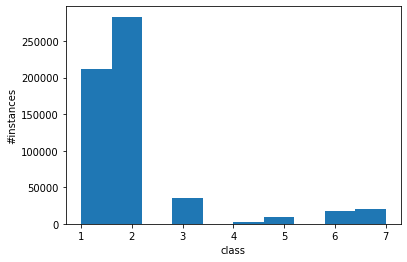

In [5]:
plt.figure()
plt.hist(Y)
plt.ylabel('#instances')
plt.xlabel('class')
plt.show()

## Training and test data

Before you can start building classifiers, you need to separate the data into training and test data. Because the data is quite large, please use 5% of the data for training, and 95% of the data for testing. Because you are selecting such a small subset, it could easily happen that not all classes are represented the same way in the training and in the test data. Use _stratified sampling_ to avoid this. 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.95, random_state=42, stratify=Y)

We check the distribution of the class labels in the training data to ensure that the stratification had the desired effect. 

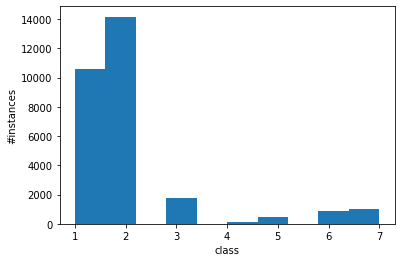

In [8]:
plt.figure()
plt.hist(Y_train)
plt.ylabel('#instances')
plt.xlabel('class')
plt.show()

## Train, Test, Evaluate

Now that training and test data are available, you can try out the classifiers from Chapter 7. You will notice that some classifiers may require a long amount of time for training and may, therefore, not be suitable for the analysis of this data set. 

Try to find a classifier that works well with the data. On this data, this means two things:
- Training and prediction in an acceptable amount of time. Use "less than 10 minutes" as definition for acceptable on this exercise sheet.
- Good prediction performance as measured with MCC, recall, precision, and F-Measure. 

The different classifiers have different parameters, also known as *hyper parameters*, e.g., the depth of a tree, or the number of trees used by a random forest. Try to find good parameters to improve the results. 

We train a $k$-Nearest Neighbors Classifier with $k=3, 5, 10$, Decision Trees with maximal depths 5, 10, and 20, Random Forests with 1000 trees in the ensemble that have maximal depth of 3 and 5, a Logistic Regression classifier, a Gaussian Naive Bayes, and MLPs with three hidden layers with 100 neurons with RelU and tanh as activation functions. Thus, we test some parameter combinations that affect the complexity of the resulting models. We do not train any SVM, because the training time is larger than 10 minutes. 

In [9]:
classifiers = [KNeighborsClassifier(3),
               KNeighborsClassifier(5),
               KNeighborsClassifier(10),
               DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=10),
               DecisionTreeClassifier(max_depth=20),
               RandomForestClassifier(n_estimators=1000, max_depth=3),
               RandomForestClassifier(n_estimators=1000, max_depth=5),
               LogisticRegression(max_iter=100000),
               GaussianNB(),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='relu'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='tanh')]

clf_names = ["Nearest Neighbors (k=3)",
             "Nearest Neighbors (k=5)",
             "Nearest Neighbors (k=10)",
             "Decision Tree (Max Depth=5)",
             "Decision Tree (Max Depth=10)",
             "Decision Tree (Max Depth=20)",
             "Random Forest (Max Depth=3)",
             "Random Forest (Max Depth=5)",
             "Logistic Regression",
             "Gaussian Naive Bayes",
             "MLP (RelU)",
             "MLP (tanh)"]

scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Nearest Neighbors (k=3)
predicting labels for classifier Nearest Neighbors (k=3)
fitting classifier Nearest Neighbors (k=5)
predicting labels for classifier Nearest Neighbors (k=5)
fitting classifier Nearest Neighbors (k=10)
predicting labels for classifier Nearest Neighbors (k=10)
fitting classifier Decision Tree (Max Depth=5)
predicting labels for classifier Decision Tree (Max Depth=5)
fitting classifier Decision Tree (Max Depth=10)
predicting labels for classifier Decision Tree (Max Depth=10)
fitting classifier Decision Tree (Max Depth=20)
predicting labels for classifier Decision Tree (Max Depth=20)
fitting classifier Random Forest (Max Depth=3)
predicting labels for classifier Random Forest (Max Depth=3)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fitting classifier Random Forest (Max Depth=5)
predicting labels for classifier Random Forest (Max Depth=5)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fitting classifier Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predicting labels for classifier Logistic Regression
fitting classifier Gaussian Naive Bayes
predicting labels for classifier Gaussian Naive Bayes
fitting classifier MLP (RelU)
predicting labels for classifier MLP (RelU)
fitting classifier MLP (tanh)
predicting labels for classifier MLP (tanh)


We now look at the scores.

In [31]:
scores_df

,Nearest Neighbors (k=3),Nearest Neighbors (k=5),Nearest Neighbors (k=10),Decision Tree (Max Depth=5),Decision Tree (Max Depth=10),Decision Tree (Max Depth=20),Random Forest (Max Depth=3),Random Forest (Max Depth=5),Logistic Regression,Gaussian Naive Bayes,MLP (RelU),MLP (tanh)
precision (macro),0.791443,0.783250,0.771295,0.639873,0.716850,0.723114,0.279480,0.279673,0.532170,0.382979,0.769944,0.576269
recall (macro),0.717409,0.680059,0.593828,0.461665,0.606345,0.693489,0.274127,0.301216,0.426783,0.582227,0.663174,0.374119
fscore (macro),0.749952,0.722707,0.653111,0.472032,0.639261,0.706874,0.273517,0.289963,0.455168,0.348337,0.697845,0.397133
precision (micro),0.845881,0.831650,0.803552,0.704661,0.755717,0.796053,0.664439,0.679398,0.708431,0.447357,0.805179,0.696369
recall (micro),0.845881,0.831650,0.803552,0.704661,0.755717,0.796053,0.664439,0.679398,0.708431,0.447357,0.805179,0.696369
fscore (micro),0.845881,0.831650,0.803552,0.704661,0.755717,0.796053,0.664439,0.679398,0.708431,0.447357,0.805179,0.696369
MCC,0.750438,0.726275,0.678803,0.513247,0.600747,0.670790,0.425586,0.458928,0.517158,0.293639,0.680702,0.493616


We can see that $k$-Nearest Neighbor yields the best results with $k=3$ and the Decision Tree and Random Forest perform better with larger depths. Morepver RelU works better than the tanh for the MLP. Logistic Regression and Gaussian Naive Bayes are clearly inferior to the best performing approaches. We now re-run the experiement. We drop the Logistic Regression, the inferior combinations of $k$ and Max Depth, and the MLP with tanh. Moreover, we consider lower values for $k$ and larger for the Max Depth, because the results may further improve. Please note that due to this second round of tuning, our *test data* is now *validation data* instead. If you perform additional tuning due to results on the test data even once, this means that you would actually need new test data. 

In [34]:
classifiers = [KNeighborsClassifier(1),
               KNeighborsClassifier(2),
               KNeighborsClassifier(3),
               DecisionTreeClassifier(max_depth=20),
               DecisionTreeClassifier(max_depth=40),
               DecisionTreeClassifier(max_depth=60),
               RandomForestClassifier(n_estimators=1000, max_depth=5),
               RandomForestClassifier(n_estimators=1000, max_depth=10),
               RandomForestClassifier(n_estimators=1000, max_depth=20),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='relu')]

clf_names = ["Nearest Neighbors (k=1)",
             "Nearest Neighbors (k=2)",
             "Nearest Neighbors (k=3)",
             "Decision Tree (Max Depth=20)",
             "Decision Tree (Max Depth=40)",
             "Decision Tree (Max Depth=60)",
             "Random Forest (Max Depth=5)",
             "Random Forest (Max Depth=10)",
             "Random Forest (Max Depth=20)",
             "MLP (RelU)"]

scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Nearest Neighbors (k=1)
predicting labels for classifier Nearest Neighbors (k=1)
fitting classifier Nearest Neighbors (k=2)
predicting labels for classifier Nearest Neighbors (k=2)
fitting classifier Nearest Neighbors (k=3)
predicting labels for classifier Nearest Neighbors (k=3)
fitting classifier Decision Tree (Max Depth=20)
predicting labels for classifier Decision Tree (Max Depth=20)
fitting classifier Decision Tree (Max Depth=40)
predicting labels for classifier Decision Tree (Max Depth=40)
fitting classifier Decision Tree (Max Depth=60)
predicting labels for classifier Decision Tree (Max Depth=60)
fitting classifier Random Forest (Max Depth=5)
predicting labels for classifier Random Forest (Max Depth=5)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


fitting classifier Random Forest (Max Depth=10)
predicting labels for classifier Random Forest (Max Depth=10)
fitting classifier Random Forest (Max Depth=20)
predicting labels for classifier Random Forest (Max Depth=20)
fitting classifier MLP (RelU)
predicting labels for classifier MLP (RelU)


We now look at the scores to see if the other parameters further improved the scores to see which classifier performs best. 

In [35]:
scores_df

,Nearest Neighbors (k=1),Nearest Neighbors (k=2),Nearest Neighbors (k=3),Decision Tree (Max Depth=20),Decision Tree (Max Depth=40),Decision Tree (Max Depth=60),Random Forest (Max Depth=5),Random Forest (Max Depth=10),Random Forest (Max Depth=20),MLP (RelU)
precision (macro),0.794655,0.820940,0.791443,0.727700,0.711408,0.714764,0.281145,0.840286,0.858069,0.750735
recall (macro),0.786020,0.675316,0.717409,0.694281,0.714149,0.716788,0.302748,0.472277,0.675403,0.690844
fscore (macro),0.790195,0.729277,0.749952,0.709070,0.712714,0.715711,0.291475,0.514868,0.728476,0.713081
precision (micro),0.869547,0.838342,0.845881,0.795682,0.797939,0.800321,0.683174,0.745785,0.835998,0.806367
recall (micro),0.869547,0.838342,0.845881,0.795682,0.797939,0.800321,0.683174,0.745785,0.835998,0.806367
fscore (micro),0.869547,0.838342,0.845881,0.795682,0.797939,0.800321,0.683174,0.745785,0.835998,0.806367
MCC,0.790433,0.743187,0.750438,0.670192,0.675715,0.679393,0.464566,0.578605,0.732535,0.686682


We observe that 1-Nearest Neighbor clearly performs best overall, with the best values for MCC, F-Score (both micro and macro), recall (both micro and macro), and precision (micro). Only for precision (macro) is slightly lower than for the $2$-Nearest Neighbor model and the Random Forest with Max Depth 10. We also observe that the Decision Tree does not further improve with deeper trees than 20. The Random Forest also performs best with depth 20. The Random Forest performs second best overall. 

We now compare the confusion matrix of the 1-Nearest Neighbor classifier with the confusion matrix of the Random Forest, with the hope that we may see an indication why the Random Forest does not achieve the same performance as the nearest neighbor algorithm. 

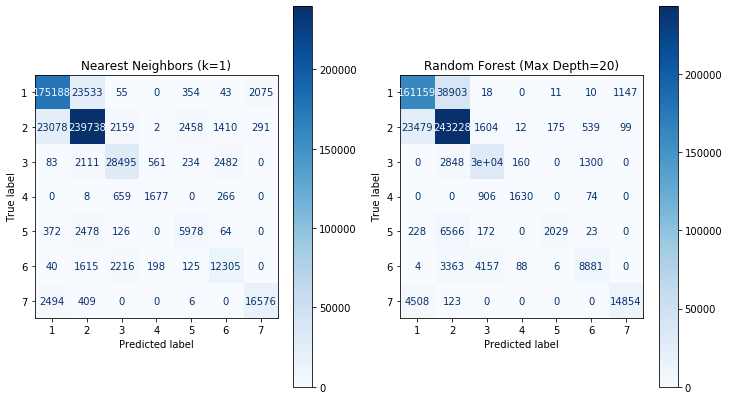

In [43]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(1,2, figsize=(12,7))
plot_confusion_matrix(classifiers[0], X_test, Y_test, cmap=plt.cm.Blues, ax=axes[0])
plot_confusion_matrix(classifiers[8], X_test, Y_test, cmap=plt.cm.Blues, ax=axes[1])
axes[0].set_title(clf_names[0])
axes[1].set_title(clf_names[8])
plt.show()

This detailed view of the performance shows us that the performance difference is mainly due to the classes 5 and 6. For both classes, the random forest is much better than the random forest. For all other classes, the performance is comparable. 